# A Kaggle competition

 https://www.kaggle.com/c/nlp-getting-started/overview

## 0. Setup

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from IPython.display import clear_output

In [2]:
train_df = pd.read_csv('./data/train.csv')

## 1. Loading & Exploring the dataset

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### columns:

* id - a unique identifier for each tweet
* keyword - a particular keyword from the tweet (may be blank)
* location - the location the tweet was sent from (may be blank)
* text - the text of the tweet
* target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


There are **7613** tweets. There are some Null values in 'keyword' and 'locations' columns. 

In [5]:
# two approches to count the number of instances in each class
# train_df.groupby('target').text.count()
#fig = px.pie(data_frame=train_df, names='target', title='Distribution of Real vs Not-Real Disaster Tweets')
#fig.show()
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

**4342** of tweets are not about real disasters and **3271** are about real disasters.

In [6]:
def display_pie_target(df, title=None):
    """Display a pie chart based on target column.
    Input: 
        df: a datafram with a target column (0 and 1 values)
        title: str
    Output:
        Display a pie chart
    """  
    sizes = np.array(df.target.value_counts()) # sizes for each slice
    labels = 'Non-Disaster', 'Disaster' # labels for classes    
    plt.pie(sizes, labels = labels, autopct='%1.1f%%') # declare the pie chart
    plt.title(title) # display the title    
    plt.show() # display the chart    

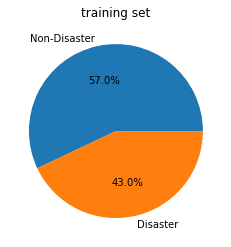

In [7]:
display_pie_target(train_df, 'training set')

221 is the number of unique values in keyword


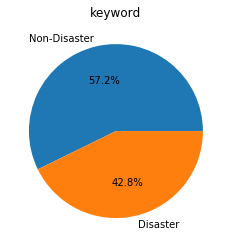

3341 is the number of unique values in location


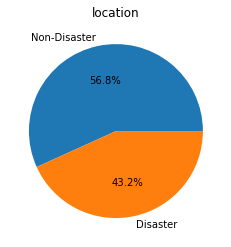

7503 is the number of unique values in text


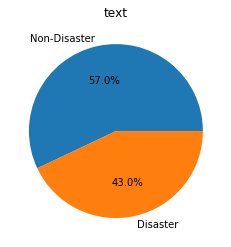

In [8]:
for col in train_df.columns[1:-1]:
    
    # dataset of rows that column is not null 
    df_notnull = train_df[train_df[col].notnull()] 
    print(len(pd.unique(df_notnull[col])), 'is the number of unique values in' , col)
    display_pie_target(df_notnull, col)

In [9]:
train_df.drop_duplicates(subset=['text'])['target'].value_counts()

0    4305
1    3198
Name: target, dtype: int64

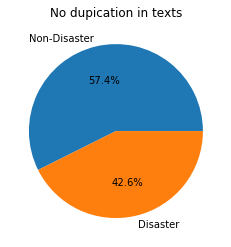

In [10]:
display_pie_target(train_df.drop_duplicates(subset=['text']),'No dupication in texts')

In [11]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 100)
clear_output()

In [12]:
x = len(train_df)
print('Dataset had {} rows.'.format(x))
train_df.drop_duplicates(subset=['keyword', 'location', 'text', 'target'], keep='first', inplace=True, ignore_index=True)
print('{} duplicated rows are removed (only the first one is kept).'.format(x - len(train_df)))

Dataset had 7613 rows.
52 duplicated rows are removed (only the first one is kept).


In [13]:
# removing all duplicates with different target values. These are considered as noise for training.
x = len(train_df)
print('Dataset had {} rows.'.format(x))
train_df.drop_duplicates(subset=['keyword', 'location', 'text'], keep=False, inplace=True, ignore_index=True)
print('{} duplicated rows are removed.'.format(x - len(train_df)))

Dataset had 7561 rows.
18 duplicated rows are removed.


In [14]:
# duplicated texts
train_df[train_df.duplicated(subset=['text'], keep=False)].sort_values(by='text')

,id,keyword,location,text,target
4251,6094,hellfire,"Jubail IC, Saudi Arabia.",#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect,0
4259,6105,hellfire,?????? ??? ?????? ????????,#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect,0
4267,6123,hellfire,?????? ???? ??????,#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect,1
1696,2459,collided,"Peterborough, On",#Newswatch: 2 vehicles collided at Lock and Lansdowne Sts in #Ptbo. Emerg crews on their way,1
1717,2488,collided,"Peterborough, Ont.",#Newswatch: 2 vehicles collided at Lock and Lansdowne Sts in #Ptbo. Emerg crews on their way,1
3758,5382,fire%20truck,"Orange County, Calif.",#SigAlert: North &amp; Southbound 133 closed btwn 5 fwy and Irvine Blvd due to truck fire. CHP is detouring traffic.,1
3763,5387,fire%20truck,"Orange County, CA",#SigAlert: North &amp; Southbound 133 closed btwn 5 fwy and Irvine Blvd due to truck fire. CHP is detouring traffic.,1
1234,1790,buildings%20on%20fire,Scotland,#TweetLikeItsSeptember11th2001 Those two buildings are on fire,1
1243,1807,buildings%20on%20fire,UK,#TweetLikeItsSeptember11th2001 Those two buildings are on fire,1
4207,6031,hazardous,"New Delhi, Delhi",#foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe and hazardous for #humanconsumption,0


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7543 entries, 0 to 7542
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7543 non-null   int64 
 1   keyword   7482 non-null   object
 2   location  5057 non-null   object
 3   text      7543 non-null   object
 4   target    7543 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 294.8+ KB


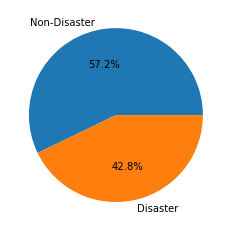

In [16]:
display_pie_target(train_df)

### Exploring raw values of text in each class

In [17]:
# display disaster rows when no column is null
train_df[(train_df.target==1) & train_df.keyword.notna() & train_df.location.notna()][:7]

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C,1
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi,1
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3ImaomknnA,1
46,66,ablaze,"GREENSBORO,NORTH CAROLINA",How the West was burned: Thousands of wildfires ablaze in California alone http://t.co/vl5TBR3wbr,1
49,73,ablaze,"Sheffield Township, Ohio",Deputies: Man shot before Brighton home set ablaze http://t.co/gWNRhMSO8k,1
50,74,ablaze,India,Man wife get six years jail for setting ablaze niece\nhttp://t.co/eV1ahOUCZA,1
52,77,ablaze,Anaheim,Police: Arsonist Deliberately Set Black Church In North CarolinaåÊAblaze http://t.co/pcXarbH9An,1


In [18]:
# print non-disaster rows when no column is null
train_df[(train_df.target==0) & train_df.keyword.notna() & train_df.location.notna()][:7]

,id,keyword,location,text,target
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw,0
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N,0
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype around new acquisitions but I doubt they will set the EPL ablaze this season.,0
39,57,ablaze,Paranaque City,Ablaze for you Lord :D,0
40,59,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw,0
42,62,ablaze,milky way,Had an awesome time visiting the CFC head office the ancop site and ablaze. Thanks to Tita Vida for taking care of us ??,0


The same keyboard (such as "ablaze") can be in both target classes.

## 2. Pre-processing

In [19]:
import re
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
import string

In [20]:
mystopwords = set(sorted(stopwords.words('english')))
print(mystopwords)

{"haven't", 'couldn', 'can', "mightn't", 'm', 'there', 'herself', 'does', 'more', 'such', 'on', 'with', 'only', 'doing', 'no', 'what', 'nor', 'ours', 'into', "shouldn't", 'if', 'll', 'y', 'had', 'yours', 'have', 'each', 'himself', 'isn', 'this', "you'd", 'these', "needn't", 'wasn', 'been', 'here', "hasn't", "should've", 'same', 'mightn', "aren't", "you're", 'is', 'having', 'am', 'just', 'that', 'doesn', 'off', 'until', 'he', 'itself', 'our', "weren't", 'for', "that'll", 'but', 'most', 'them', 'ourselves', 'very', 'and', 'any', 'be', 'other', 'again', 'will', 'which', 've', 'its', 'both', 'at', 'under', 'too', 's', 'not', "couldn't", 'during', 'haven', 'needn', 't', 'where', 'was', 'a', 'shan', 'shouldn', 'we', 'yourself', 'whom', 'own', 'an', 'him', 'the', 're', 'those', 'weren', 'hers', 'because', "wouldn't", 'ain', 'it', 'when', 'once', 'hasn', 'ma', 'how', "shan't", 'wouldn', 'now', 'before', "you've", 'yourselves', 'below', 'your', 'won', 'being', 'his', 'o', "she's", 'my', "won't"

In [21]:
# adding some contractions to the list of stop words.
print(len(mystopwords))
mystopwords.update(["ain't", "i'm", "they've", "they're", "he's", "how's", "how're", "that's", "what's", "when's", 
                    "where's", "we're", "we'll", "who's"])
print(len(mystopwords))

179
193


In [22]:
def clean_tweet(text):
    tknzr = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
    punc = string.punctuation # a string of punctuations   '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    #stopw = stopwords.words('english') # a list of English stopwords
    stopw = mystopwords
    ptrn = '(https://)|(http://)|(www.)'
    wnlemm = WordNetLemmatizer()
        
    tokens = tknzr.tokenize(text) # converts a string to a list of tokens, all lower-case, reduced-lenght, handles are removed
    tokens = [word for word in tokens if word not in stopw] # removes all stopwords
    tokens = [word for word in tokens if word not in punc] # removes punctuation elements of the array
    tokens = [word for word in tokens if not re.match(ptrn, word)] # removes hyperlinks 
    #tokens = [wnlemm.lemmatize(word) for word in tokens] # lemmetizes
    #return(tokens)
    
    text = ' '.join([wnlemm.lemmatize(word) for word in tokens]) # lemmetizes and concatenates elements 
    return(text)

In [23]:
# testing the function
test_text = "@PhDSquares #mufc  goose geese ain't 20000 they've built sooooo much hype around new - pop-up acquisitions but when's I doubted they will set the EPL ablaze this season. Check these out: WWW.t.co/rOI2NSmEJJ https://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw"
print(test_text)
clean_tweet(test_text)

@PhDSquares #mufc  goose geese ain't 20000 they've built sooooo much hype around new - pop-up acquisitions but when's I doubted they will set the EPL ablaze this season. Check these out: WWW.t.co/rOI2NSmEJJ https://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw


'#mufc goose goose 2000 built sooo much hype around new pop-up acquisition doubted set epl ablaze season check #nsfw'

In [24]:
# adding the clean text to the dataframe
train_df['cleaned_text'] = train_df['text'].apply(lambda x: clean_tweet(x))
train_df.head(3)

,id,keyword,location,text,target,cleaned_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,deed reason #earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,resident asked shelter place notified officer evacuation shelter place order expected


In [25]:
train_df.dropna(subset=['location']).head()

,id,keyword,location,text,target,cleaned_text
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C,1,wholesale market ablaze
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw,0,always try bring heavy #metal #rt
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi,1,#africanbaze breaking news nigeria flag set ablaze aba
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,cry set ablaze
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N,0,plus side look sky last night ablaze


In [26]:
len(train_df.location.unique()), len(train_df.keyword.unique())

(3342, 222)

#### Future plan
- preprocessing location and keyword features

### Vectorizing

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=50000)
X_tfidf = vectorizer.fit_transform(train_df['cleaned_text'])

X_vectorized = pd.DataFrame(X_tfidf.toarray())
X_vectorized.columns = vectorizer.get_feature_names()
X_vectorized.shape

(7543, 50000)

In [29]:
X_vectorized.head()

,00,00 11,00 11 16,00 52,00 52 25,00 ep,00 pm,00 pm 06,000,000 riot,...,ûóher upper,ûóher upper arm,ûókody,ûókody vine,ûónegligence,ûónegligence firework,ûónegligence firework explosion,ûótech,ûótech business,ûówe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.253045,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3. Feature engineering
### Feature creation:

In [30]:
from textblob import TextBlob

In [31]:
# creating a new feature to show if a tweet contains huperlink or not
ptrn = '(https://)|(http://)|(www.)'
train_df['has_link'] = train_df['text'].apply(lambda x: 1 if re.search(ptrn, x, re.IGNORECASE) else 0)
train_df.head(3)

,id,keyword,location,text,target,cleaned_text,has_link
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,deed reason #earthquake may allah forgive u,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,resident asked shelter place notified officer evacuation shelter place order expected,0


In [32]:
train_df['has_link'].value_counts()

1    3956
0    3587
Name: has_link, dtype: int64

In [33]:
# extracting two new features (polarity and subjectivity) from text
train_df['polarity'] = train_df['text'].apply(lambda x: TextBlob(x).polarity)
train_df['subjectivity'] = train_df['text'].apply(lambda x: TextBlob(x).subjectivity)
train_df.head(3)

,id,keyword,location,text,target,cleaned_text,has_link,polarity,subjectivity
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,deed reason #earthquake may allah forgive u,0,0.00000,0.0000
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,0,0.10000,0.4000
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,resident asked shelter place notified officer evacuation shelter place order expected,0,-0.01875,0.3875


#### Future plan
- creating a feature: the number of tokens in cleaned text
- creating a feature: percentage of number of alphabefic letters in text over the text lenght
- creating a new feature: the number of hashtags in cleaned text

### Feature evaluation

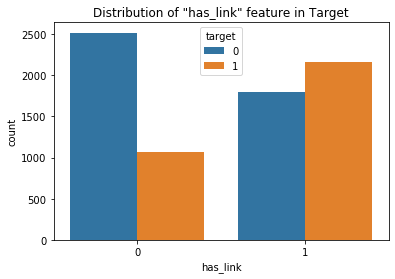

In [34]:
sns.countplot(data=train_df, x='has_link', hue='target', )
plt.title('Distribution of "has_link" feature in Target')
plt.show()

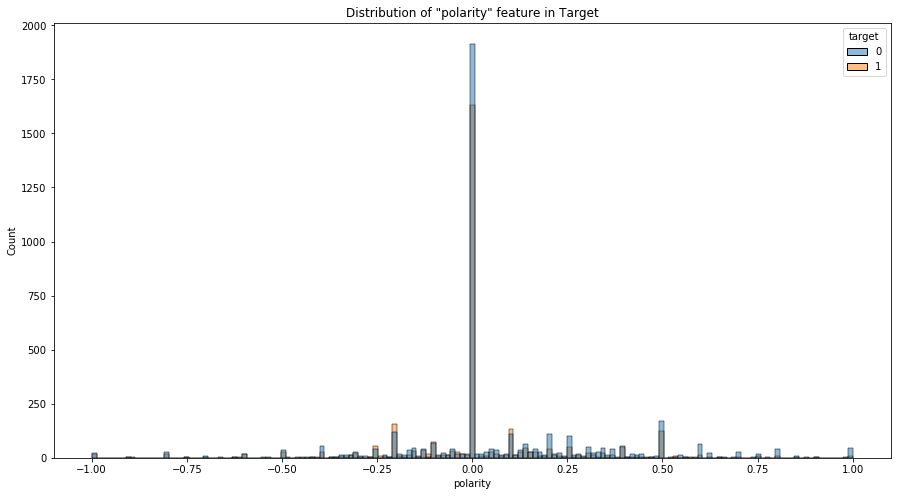

In [35]:
plt.figure(figsize=(15,8))
sns.histplot(data=train_df, x='polarity', hue='target')
plt.title('Distribution of "polarity" feature in Target')
plt.show()

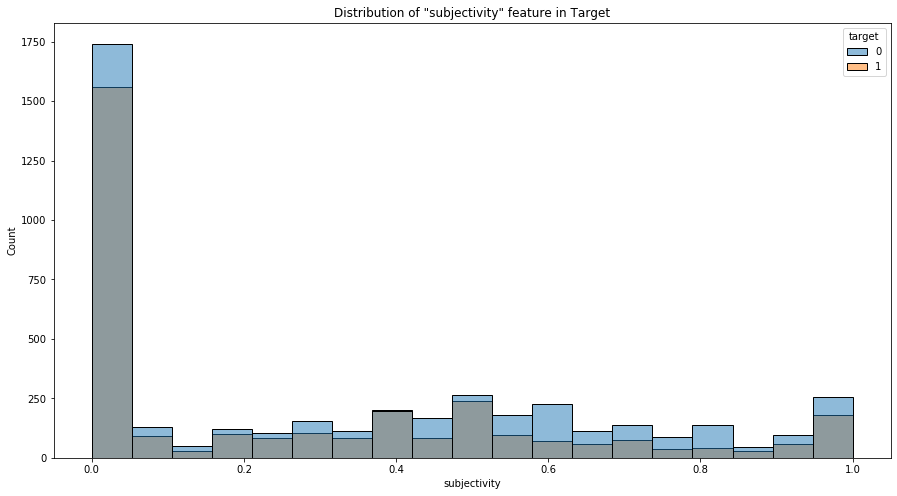

In [36]:
plt.figure(figsize=(15,8))
sns.histplot(data=train_df, x='subjectivity', hue='target')
plt.title('Distribution of "subjectivity" feature in Target')
plt.show()

### Feature transformation

#### (Box-Cox):

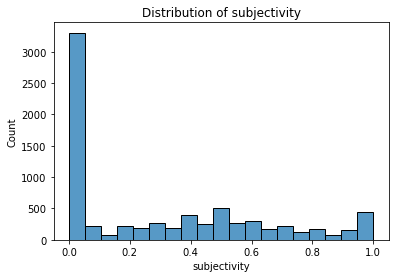

In [37]:
sns.histplot(train_df['subjectivity'])
plt.title('Distribution of subjectivity')
plt.show()

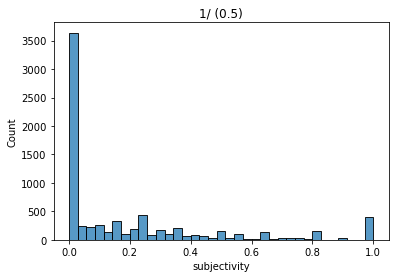

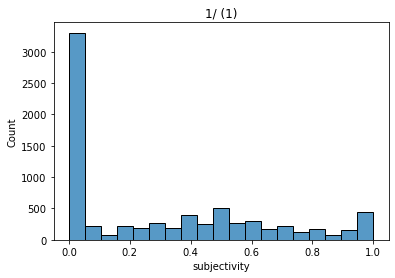

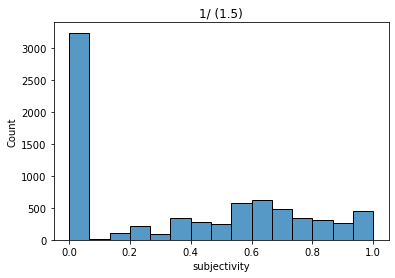

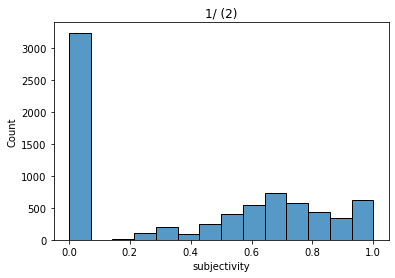

In [38]:
for i in [.5,1,1.5,2]:
    sns.histplot(data=train_df['subjectivity']**(1/i))
    plt.title('1/ ({})'.format(i))
    plt.show()

#### Transforming polarity to positive range (preparation for feature selection):

In [39]:
train_df['polarity'] = train_df['polarity'] + 1

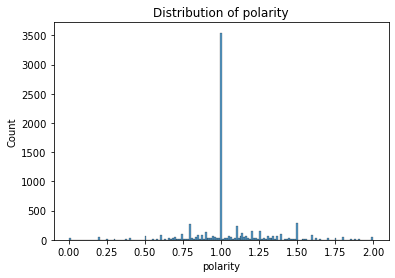

In [40]:
sns.histplot(train_df['polarity'])
plt.title('Distribution of polarity')
plt.show()

### Feature Selection (Chi-Square)

In [41]:
from sklearn.feature_selection import SelectKBest, chi2

In [42]:
X = pd.concat([train_df['has_link'], train_df['polarity'], train_df['subjectivity'], X_vectorized], axis=1)
X.shape

(7543, 50003)

In [43]:
y = train_df['target']
y.shape

(7543,)

In [44]:
# selecting 5000 best features with chi-sque
skb = SelectKBest(chi2, k=5000)
skb.fit_transform(X,y)

selected_columns = [X.columns[i] for i in skb.get_support(indices=True)]
X = X[selected_columns]
X.shape

(7543, 5000)

In [45]:
print(X.columns)

Index(['has_link', 'polarity', 'subjectivity', '00', '00 11', '00 pm', '01',
       '01 04', '01 04 01', '01 04 utc',
       ...
       'ûïrichmond coach devastated', 'ûïwhen', 'ûïwhen saw',
       'ûïwhen saw coach', 'ûò', 'ûò fire', 'ûò fire lovefood', 'ûò video',
       'ûókody', 'ûókody vine'],
      dtype='object', length=5000)


## 4. Building Classification Models

In [46]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as scores

In [47]:
k_fold = KFold(n_splits=10, shuffle=True)

In [48]:
def prodcue_result(label, label_pred):
    
    cmatrix = confusion_matrix(label, label_pred)
    print('Confusion matrix:\n', cmatrix)

    precision, recall, fscore, _ = scores(label, label_pred, pos_label=1, average='binary')
    accuracy= np.mean(label==label_pred)
    print(' Precision: {}\n Recall:    {} \n Accuracy:  {}\n F-Score:   {}\n'.format(
        round(precision,4), round(recall,4), round(accuracy,4), round(fscore,4)))
    
    #return(cmatrix, precision, recall, accuracy, fscore)

### Random Forest:

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
n, d = 150, None
rf = RandomForestClassifier(n_estimators=n, max_depth=d, n_jobs=-1)

y_predict = cross_val_predict(rf, X, y, cv=k_fold)
prodcue_result(y, y_predict)

Confusion matrix:
 [[3888  425]
 [1136 2094]]
 Precision: 0.8313
 Recall:    0.6483 
 Accuracy:  0.7931
 F-Score:   0.7285



In [51]:
trained_model = rf.fit(X,y)
new_predictions = trained_model.predict(X)
prodcue_result(y, new_predictions)

Confusion matrix:
 [[4290   23]
 [  90 3140]]
 Precision: 0.9927
 Recall:    0.9721 
 Accuracy:  0.985
 F-Score:   0.9823



### Most important features in classification:

In [52]:
sorted(zip(rf.feature_importances_, X.columns), reverse=True)[:20]

[(0.02929895784777924, 'has_link'),
 (0.026503953307214154, 'polarity'),
 (0.022376143671361984, 'subjectivity'),
 (0.014829854427993287, 'fire'),
 (0.00855496812288062, 'hiroshima'),
 (0.006750354812826596, 'storm'),
 (0.006709502871280975, 'killed'),
 (0.006045121042579885, 'train'),
 (0.006040039959712443, 'california'),
 (0.0058743685845257946, 'flood'),
 (0.00546892759341156, 'police'),
 (0.0052948284474699184, 'wildfire'),
 (0.005108969218244422, 'building'),
 (0.005065603994976512, 'like'),
 (0.004861691685352315, 'bombing'),
 (0.004799631215027799, 'disaster'),
 (0.004751899423325114, 'crash'),
 (0.004540165189393385, 'earthquake'),
 (0.0040549184067466245, 'death'),
 (0.003948730343821335, 'news')]

### Saving classifier models:

In [53]:
import pickle

In [54]:
def save_model(model, filename):
    pickle.dump(model, open('model/'+filename, 'wb'))

In [55]:
save_model(rf, 'RandomForrest_150_None.sav')

## 5. Model Validation 

In [56]:
# uploading test set
test_df = pd.read_csv('data/test.csv')
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [57]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


### Transforming test set to vectorized features:

In [58]:
def transform_data(dataframe):
    data = dataframe.copy()
    data['cleaned_text'] = data['text'].apply(lambda x: clean_tweet(x))
    #data_vectorized = pd.DataFrame.sparse.from_spmatrix(vectorizer.transform(data['cleaned_text']))
    data_vectorized = pd.DataFrame(vectorizer.transform(data['cleaned_text']).toarray())
    data_vectorized.columns = vectorizer.get_feature_names()
    
    ptrn = '(https://)|(http://)|(www.)'
    data['has_link'] = data['text'].apply(lambda x: 1 if re.search(ptrn, x, re.IGNORECASE) else 0)
    
    data['polarity'] = data['text'].apply(lambda x: TextBlob(x).polarity + 1)
    data['subjectivity'] = data['text'].apply(lambda x: TextBlob(x).subjectivity)
          
    data_features = pd.concat([data['has_link'], data['polarity'], data['subjectivity'], data_vectorized], axis=1)
    data_features = data_features[selected_columns]
        
    return(data_features)

In [59]:
def validate_model(test_set, model):
    testset = transform_data(test_set)
    y_prediction = model.predict(testset)
    return(y_prediction)

In [60]:
y_pred = validate_model(test_df, rf)
y_pred.shape

(3263,)

In [61]:
test_df['target'] = pd.Series(y_pred)
test_df.head()

,id,keyword,location,text,target
0,0,NaN,NaN,Just happened a terrible car crash,0
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone.",1
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all",1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,1
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1


In [62]:
output = test_df[['id','target']]
output.head()

,id,target
0,0,0
1,2,1
2,3,1
3,9,1
4,11,1


In [63]:
output.to_csv('data/submission.csv', index=False)